In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f224050>,
      dtype=object)

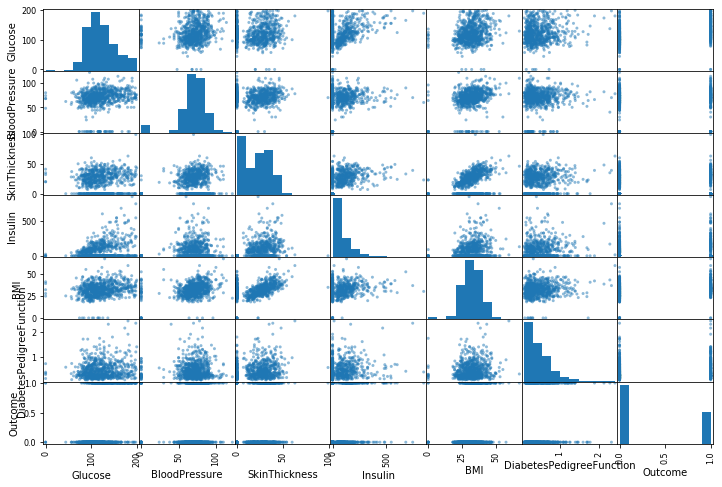

In [ ]:
%matplotlib inline
from pandas.plotting import scatter_matrix
attributes = ["Glucose", "BloodPressure","SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction",'Outcome']
scatter_matrix(diabetes_data[attributes], figsize=(12, 8))

In [ ]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
X_train.shape

(512, 8)

In [ ]:
X_test.shape

(256, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [ ]:
print(len(X_train))
print(len(X_test))

512
256


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.771
Test set score: 0.727


In [ ]:
logreg.intercept_.T

array([-0.69624997])

In [ ]:
logreg.coef_.T

array([[ 0.21049572],
       [ 0.4711509 ],
       [-0.02096702],
       [-0.00749139],
       [ 0.0892367 ],
       [ 0.29797192],
       [ 0.11138352],
       [ 0.13294067]])

### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[150  17]
 [ 53  36]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       167
           1       0.68      0.40      0.51        89

    accuracy                           0.73       256
   macro avg       0.71      0.65      0.66       256
weighted avg       0.72      0.73      0.71       256



### ROC

In [1]:
from sklearn import metrics


print("Accuracy=", metrics.accuracy_score(y_test, y_pred))
 
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="logreg, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

NameError: ignored

### Gains / Lift Chart

In [ ]:

#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

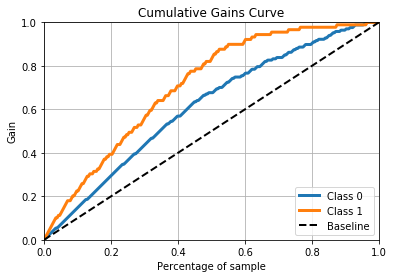

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

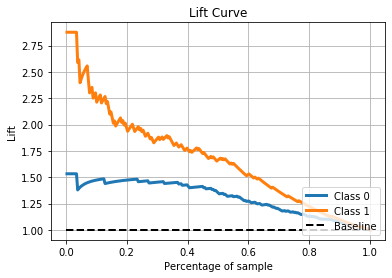

In [ ]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()

# K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.171875 % and k = [9, 10, 11]


### K-NN Result Visualisation

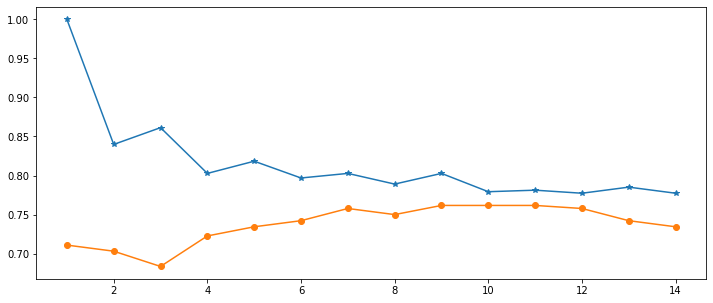

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
plt.plot(range(1,15),test_scores,marker='o',label='Test Score')

This one compares...

#### The best result is captured at k = 11 hence 11 is used for the final model

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76171875

## Model Performance Analysis

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,145,22,167
1,39,50,89
All,184,72,256


In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       167
           1       0.69      0.56      0.62        89

    accuracy                           0.76       256
   macro avg       0.74      0.72      0.72       256
weighted avg       0.76      0.76      0.75       256



In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

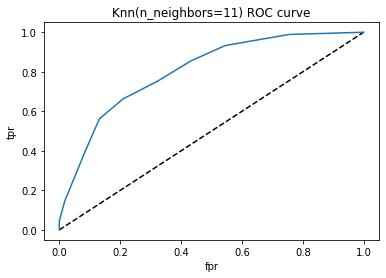

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn, auc='+str(auc))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8042454417008679

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7772701313535123
Best Parameters: {'n_neighbors': 19}


# Naiive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [ ]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

In [ ]:
# Training your model 
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
mod.score(X_test,y_test)

0.73828125

In [ ]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[132  35]
 [ 32  57]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       167
           1       0.62      0.64      0.63        89

    accuracy                           0.74       256
   macro avg       0.71      0.72      0.71       256
weighted avg       0.74      0.74      0.74       256



In [ ]:
# You can compare the performance of multiple models in one ROC chart. Wrtie your own codes in the cells below.

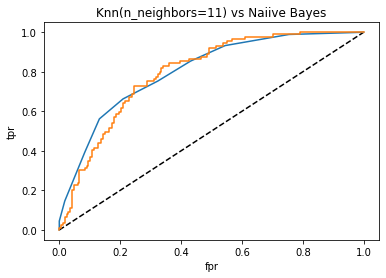

In [ ]:

y_pred_proba_nb = mod.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test,  y_pred_proba_nb)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.plot(fpr_nb,tpr_nb,label="NB")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) vs Naiive Bayes')
plt.show()